In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


3. Problem1

In [ ]:
import pandas as pd
import numpy as np

url = '/content/drive/MyDrive/Datasets/diabetes.csv'
df = pd.read_csv(url)

print("Dataset Information:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

df.fillna(df.mean(), inplace=True)
print("\nMissing Values After Imputation:")
print(df.isnull().sum())

X = df.drop(columns=['Outcome'])
y = df['Outcome']

np.random.seed(42)
indices = np.random.permutation(len(X))
train_size = int(0.7 * len(X))
train_indices = indices[:train_size]
test_indices = indices[train_size:]

X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

print(f"\nTraining Set Shape: {X_train.shape}, Test Set Shape: {X_test.shape}")

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def knn_predict(X_train, y_train, X_test, k=3):
    predictions = []

    for test_point in X_test.values:
        distances = [euclidean_distance(test_point, train_point) for train_point in X_train.values]

        k_nearest_indices = np.argsort(distances)[:k]
        k_nearest_labels = y_train.iloc[k_nearest_indices]
        predicted_class = k_nearest_labels.mode()[0]
        predictions.append(predicted_class)

    return np.array(predictions)

def knn_predict_all(X_train, y_train, X_test, k=3):
    return knn_predict(X_train, y_train, X_test, k)

predictions = knn_predict_all(X_train, y_train, X_test, k=5)
accuracy = np.mean(predictions == y_test)
print(f"\nAccuracy of KNN Classifier: {accuracy * 100:.2f}%")


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Summary Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.10

problem2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Accuracy on original data: 67.53%
Accuracy on scaled data: 71.00%


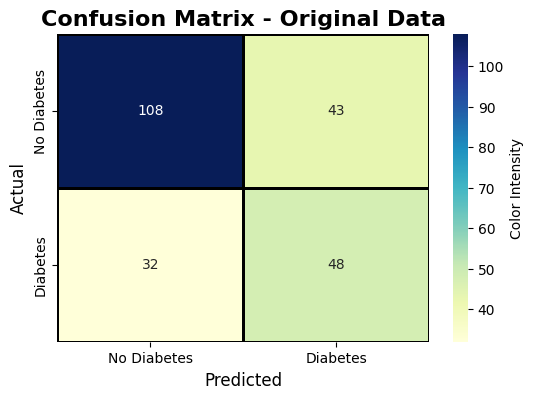

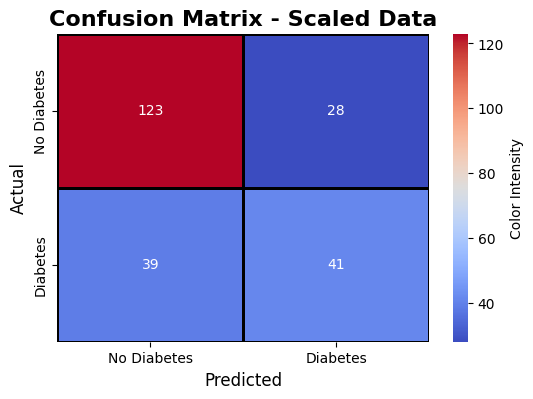

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

file_path = '/content/drive/MyDrive/Datasets/diabetes.csv'
df = pd.read_csv(file_path)
df.head()
df.info()
df.describe()
df.isnull().sum()
df = df.fillna(df.median())

X = df.drop(columns=['Outcome'])
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def predict_single(X_train, y_train, query, k=3):
    distances = [euclidean_distance(query, x) for x in X_train.values]
    k_indices = np.argsort(distances)[:k]
    k_nearest_labels = [y_train.iloc[i] for i in k_indices]
    return np.bincount(k_nearest_labels).argmax()

def predict_all(X_train, y_train, X_test, k=3):
    predictions = [predict_single(X_train, y_train, x, k) for x in X_test.values]
    return np.array(predictions)

y_pred_original = predict_all(X_train, y_train, X_test, k=3)
accuracy_original = np.mean(y_pred_original == y_test)
print(f'Accuracy on original data: {accuracy_original * 100:.2f}%')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
y_pred_scaled = predict_all(pd.DataFrame(X_train_scaled), pd.Series(y_train_scaled), pd.DataFrame(X_test_scaled), k=3)

accuracy_scaled = np.mean(y_pred_scaled == y_test_scaled)
print(f'Accuracy on scaled data: {accuracy_scaled * 100:.2f}%')

cm_original = confusion_matrix(y_test, y_pred_original)
cm_scaled = confusion_matrix(y_test_scaled, y_pred_scaled)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_original, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'], linewidths=1, linecolor='black', cbar_kws={'label': 'Color Intensity'})
plt.title('Confusion Matrix - Original Data', fontsize=16, fontweight='bold')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

plt.figure(figsize=(6, 4))
sns.heatmap(cm_scaled, annot=True, fmt='d', cmap='coolwarm', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'], linewidths=1, linecolor='black', cbar_kws={'label': 'Color Intensity'})
plt.title('Confusion Matrix - Scaled Data', fontsize=16, fontweight='bold')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


Problem3

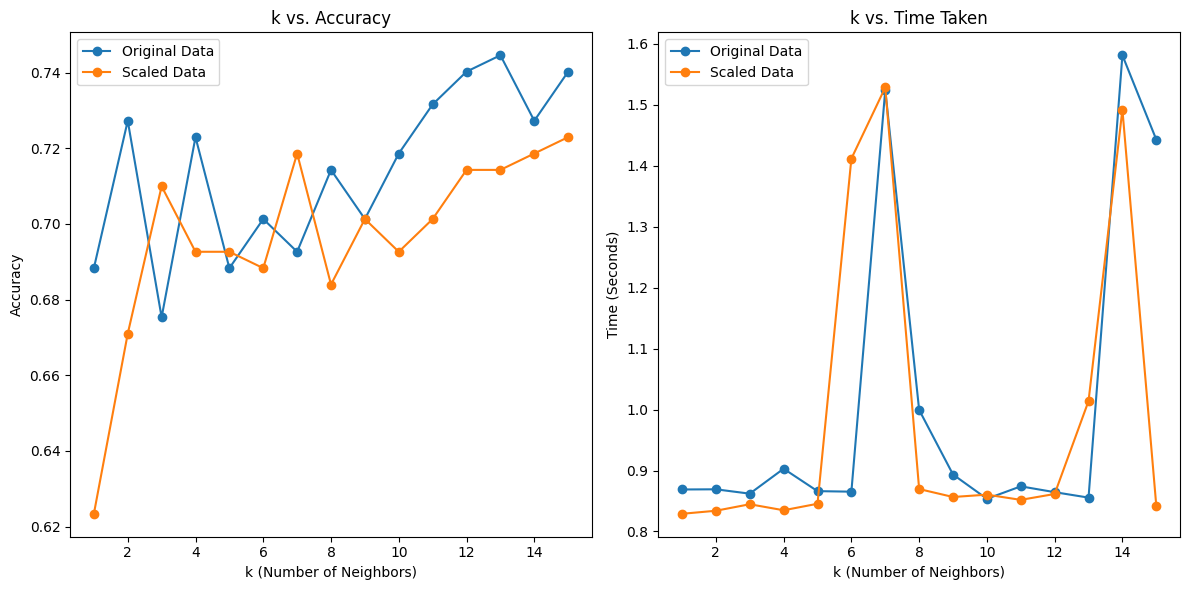

Optimal k for original data: 13 with accuracy 74.46%
Optimal k for scaled data: 15 with accuracy 72.29%


In [ ]:
#Problem-3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import time

file_path = '/content/drive/MyDrive/Datasets/diabetes.csv'
df = pd.read_csv(file_path)

df = df.fillna(df.median())

X = df.drop(columns=['Outcome'])
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def predict_single(X_train, y_train, query, k=3):
    distances = [euclidean_distance(query, x) for x in X_train.values]
    k_indices = np.argsort(distances)[:k]
    k_nearest_labels = [y_train.iloc[i] for i in k_indices]
    return np.bincount(k_nearest_labels).argmax()

def predict_all(X_train, y_train, X_test, k=3):
    predictions = [predict_single(X_train, y_train, x, k) for x in X_test.values]
    return np.array(predictions)

k_values = range(1, 16)
accuracy_original = []
accuracy_scaled = []
time_original = []
time_scaled = []

for k in k_values:
    start_time = time.time()
    y_pred_original = predict_all(X_train, y_train, X_test, k)
    accuracy_original.append(np.mean(y_pred_original == y_test))
    time_original.append(time.time() - start_time)

    start_time = time.time()
    y_pred_scaled = predict_all(pd.DataFrame(X_train_scaled), pd.Series(y_train_scaled), pd.DataFrame(X_test_scaled), k)
    accuracy_scaled.append(np.mean(y_pred_scaled == y_test_scaled))
    time_scaled.append(time.time() - start_time)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, accuracy_original, label='Original Data', marker='o')
plt.plot(k_values, accuracy_scaled, label='Scaled Data', marker='o')
plt.title('k vs. Accuracy')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(k_values, time_original, label='Original Data', marker='o')
plt.plot(k_values, time_scaled, label='Scaled Data', marker='o')
plt.title('k vs. Time Taken')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Time (Seconds)')
plt.legend()

plt.tight_layout()
plt.show()

# Discussion
optimal_k_original = k_values[np.argmax(accuracy_original)]
optimal_k_scaled = k_values[np.argmax(accuracy_scaled)]

print(f'Optimal k for original data: {optimal_k_original} with accuracy {max(accuracy_original) * 100:.2f}%')
print(f'Optimal k for scaled data: {optimal_k_scaled} with accuracy {max(accuracy_scaled) * 100:.2f}%')